In [1]:
##Prompt chaining is an overkill when used with langgraph-  but this is a just an example where llm generates detailed outline and summarize it later.

from langgraph.graph import START, END, StateGraph
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
from langchain_core.prompts import ChatPromptTemplate
from IPython.display import Image, display

load_dotenv()

gpt_llm = ChatOpenAI(model= "gpt-4o-mini")

class Blog(TypedDict):
    topic: str
    outline: str
    summary: str
    #final_response: str

def generate_outline(state : Blog) -> Blog:
    topic=state['topic']

    prompt_template=  ChatPromptTemplate.from_messages(
        [
            ("system","You are an AI Assistant who will help in answering questions only about science"),
            ("human","Please give me a detailed outline about the {topic}")

        ]
    )

    chain = prompt_template | gpt_llm

    outline=chain.invoke({"topic":topic}).content
    state['outline']=outline

    return state

def generate_outline_summary(state : Blog) -> Blog:
    outline=state['outline']

    prompt_template=  ChatPromptTemplate.from_messages(
        [
            ("system","You are an AI Assistant who will help in summarizing the subject"),
            ("human","Please help in summarizing the text {outline}")

        ]
    )

    chain = prompt_template | gpt_llm

    summary=chain.invoke({"outline":outline}).content
    state['summary']=summary

    return state

graph = StateGraph(Blog)

graph.add_node("generate_outline",generate_outline)
graph.add_node("generate_outline_summary",generate_outline_summary)
graph.add_edge(START,"generate_outline")
graph.add_edge("generate_outline","generate_outline_summary")
graph.add_edge("generate_outline_summary",END)

workflow=graph.compile()

topic="Black Hole"

final_state=workflow.invoke({"topic":topic})
print(50*("="))
print(f"Outline for the topic {topic}")
print(50*("="))
print(final_state['outline'])
print(50*("="))
print(f"Summary as below for the {topic}")
print(50*("="))
print(final_state['summary'])
print(50*("="))
print(final_state)


Outline for the topic Black Hole
Sure! Here’s a detailed outline about black holes, covering several key aspects of their nature, formation, and significance in astrophysics:

### I. Introduction to Black Holes
   A. Definition of a Black Hole
   B. Historical Context
      1. Early theories and mathematics (e.g., John Michell, Albert Einstein)
      2. Development of general relativity

### II. Properties of Black Holes
   A. Event Horizon
      1. Definition and significance
      2. The point of no return
   B. Singularity
      1. Nature of singularity
      2. Breakdown of physical laws
   C. Mass, Charge, and Angular Momentum
      1. Classification of black holes based on these properties
      2. The no-hair theorem

### III. Types of Black Holes
   A. Stellar Black Holes
      1. Formation from the collapse of massive stars
      2. Mass range (typically 3 to a few tens of solar masses)
   B. Supermassive Black Holes
      1. Presence in the centers of galaxies
      2. Mass r

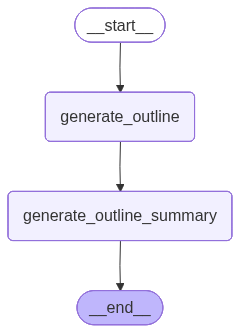

In [2]:
display(Image(workflow.get_graph().draw_mermaid_png()))